# Digits Recognization with non-linear SVMs

## Import nescessary Libraries and Split data into training sets and testinc sets

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the train and test datasets
df_train = pd.read_csv('Datasets\\train.csv')
df_test = pd.read_csv('Datasets\\test.csv')

# Spliting train data into X_train, Y_train
X_train = df_train.iloc[:, 1:]
Y_train = df_train.iloc[:, 0]

X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Show out lable
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [3]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Normalize inputs
X_train = X_train / 255.0
print(X_train)

# Fill missing values with 0
X_train = np.nan_to_num(X_train, nan=0)

# Count missing values
missing_values = np.isnan(X_train)
missing_sum = np.sum(missing_values)

print("Total missing values:", missing_sum)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Total missing values: 0


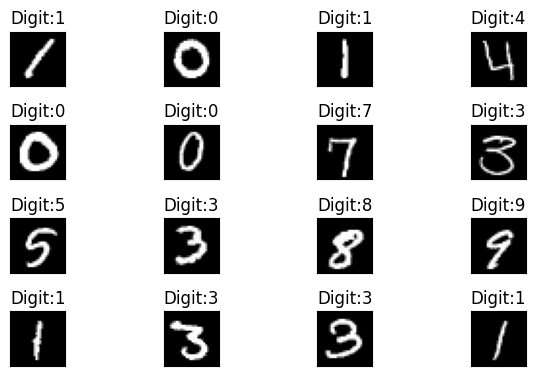

In [4]:
def plot_digits(X, Y):
    for i in range(16):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_digits(X_train, Y_train)

# Visual digits: Increase dimension

<h1>Manual PCA here</h1>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def pca_manual_code(X, n_components):
    """
    Perform PCA (Principal Component Analysis) on the input data X and plot if n_components is 3.

    Args:
    - X (numpy.ndarray): Input data matrix of shape (n_samples, n_features).
    - n_components (int): Number of principal components to retain.

    Returns:
    - numpy.ndarray: Transformed data matrix of shape (n_samples, n_components).
    - numpy.ndarray: Principal components (eigenvectors) of shape (n_features, n_components).
    """
    # Center the data
    X_centered = X - np.mean(X, axis=0)

    # Compute the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]

    # Select the top n_components eigenvectors
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]

    # Project the data onto the principal components
    transformed_data = np.dot(X_centered, top_eigenvectors)

    # Plot if n_components is 3
    if n_components == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2])
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        plt.show()

    return transformed_data, top_eigenvectors

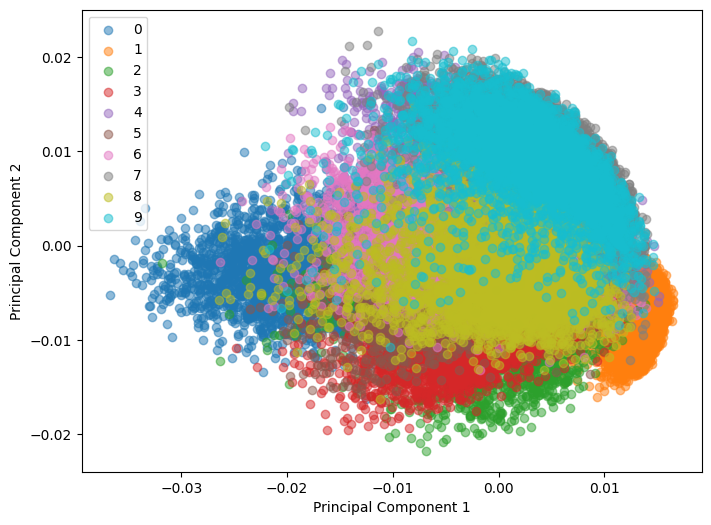

In [14]:
# Assuming X_train is a list of 25x25 pixel matrices and Y_train is the corresponding labels

# Flatten the pixel matrices
X_train_flattened = [image.flatten() for image in X_train]

# Convert lists to numpy arrays
X_train_flattened = np.array(X_train_flattened)
Y_train = np.array(Y_train)

# Normalize inputs
X_train_flattened = X_train_flattened / 255.0

# Perform PCA
X_train_pca, _ = pca_manual_code(X_train_flattened, n_components=2)  # Project to 2 dimensions for visualization

# Plot the transformed data
plt.figure(figsize=(8, 6))
for label in np.unique(Y_train):
    plt.scatter(X_train_pca[Y_train == label, 0],
                X_train_pca[Y_train == label, 1],
                label=str(label),
                alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()


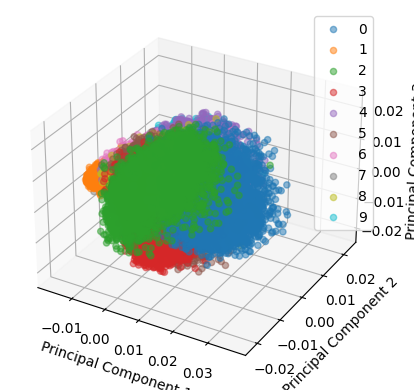

In [7]:
# Assuming X_train is a list of 25x25 pixel matrices and Y_train is the corresponding labels

# Flatten the pixel matrices
X_train_flattened = [image.flatten() for image in X_train]

# Convert lists to numpy arrays
X_train_flattened = np.array(X_train_flattened)
Y_train = np.array(Y_train)

# Normalize inputs
X_train_flattened = X_train_flattened / 255.0

# Perform PCA
pca = PCA(n_components=3)  # Project to 3 dimensions for visualization
X_train_pca = pca.fit_transform(X_train_flattened)

# Plot the transformed data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(Y_train):
    ax.scatter(X_train_pca[Y_train == label, 0],
               X_train_pca[Y_train == label, 1],
               X_train_pca[Y_train == label, 2],
               label=str(label),
               alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# You can now interactively zoom in/out and rotate the plot using your mouse.
plt.show()


# Approach: Find hyperplane between two labels.

## Visual label 2 and label 3 by increasing dimension method.

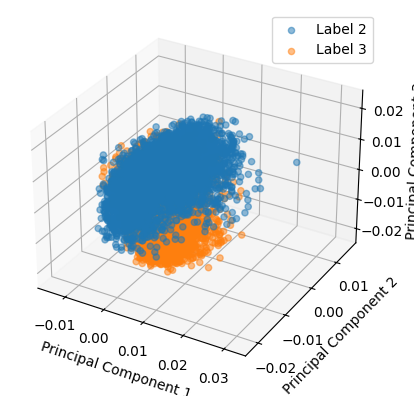

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_train is a list of 25x25 pixel matrices and Y_train is the corresponding labels

# Flatten the pixel matrices
X_train_flattened = [image.flatten() for image in X_train]

# Convert lists to numpy arrays
X_train_flattened = np.array(X_train_flattened)
Y_train = np.array(Y_train)

# Normalize inputs
X_train_flattened = X_train_flattened / 255.0

# Perform PCA
pca = PCA(n_components=3)  # Project to 3 dimensions for visualization
X_train_pca = pca.fit_transform(X_train_flattened)

# Plot the transformed data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with label 2
ax.scatter(X_train_pca[Y_train == 2, 0],
           X_train_pca[Y_train == 2, 1],
           X_train_pca[Y_train == 2, 2],
           label='Label 2',
           alpha=0.5)

# Plot data points with label 3
ax.scatter(X_train_pca[Y_train == 3, 0],
           X_train_pca[Y_train == 3, 1],
           X_train_pca[Y_train == 3, 2],
           label='Label 3',
           alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


## Find Hyperplane between digit 2 and digit 3

## Using library

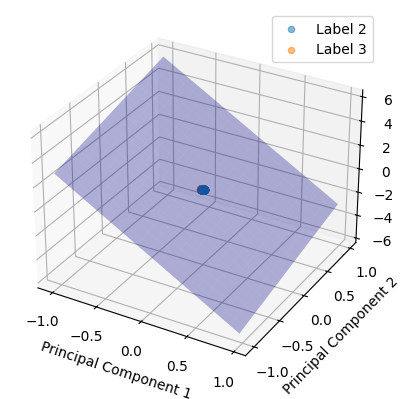

Accuracy: 0.9098264540337712


In [9]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm

# Assuming X_train is a list of 25x25 pixel matrices and Y_train is the corresponding labels

# Filter data points with labels 2 and 3
X_filtered = X_train[np.logical_or(Y_train == 2, Y_train == 3)]
Y_filtered = Y_train[np.logical_or(Y_train == 2, Y_train == 3)]

# Flatten the pixel matrices
X_train_flattened = [image.flatten() for image in X_filtered]

# Convert lists to numpy arrays
X_train_flattened = np.array(X_train_flattened)
Y_filtered = np.array(Y_filtered)

# Normalize inputs
X_train_flattened = X_train_flattened / 255.0

# Fit PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_flattened)

# Fit SVM to separate data points with labels 2 and 3
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train_pca, Y_filtered)

# Create meshgrid for plotting the hyperplane
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
z_min, z_max = X_train_pca[:, 2].min() - 1, X_train_pca[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
zz = (-svm_classifier.intercept_[0] - svm_classifier.coef_[0][0] * xx - svm_classifier.coef_[0][1] * yy) / svm_classifier.coef_[0][2]

# Plot the data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points with label 2
ax.scatter(X_train_pca[Y_filtered == 2, 0],
           X_train_pca[Y_filtered == 2, 1],
           X_train_pca[Y_filtered == 2, 2],
           label='Label 2',
           alpha=0.5)

# Plot data points with label 3
ax.scatter(X_train_pca[Y_filtered == 3, 0],
           X_train_pca[Y_filtered == 3, 1],
           X_train_pca[Y_filtered == 3, 2],
           label='Label 3',
           alpha=0.5)

# Plot hyperplane
ax.plot_surface(xx, yy, zz, color='b', alpha=0.3)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

# Evaluate and print accuracy
accuracy = svm_classifier.score(X_train_pca, Y_filtered)
print("Accuracy:", accuracy)


---

## Manual coding

SVM in a cassificaiton problem, the goal is to draw a hyperplane that separate the data points into distinct categories.


### Support Vector Machines (SVM) Mathematics

Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. In classification, SVM finds the hyperplane that best separates the classes in the feature space. Here's a brief overview of the mathematics behind SVM:

1. **Objective**:
   The main objective of SVM is to find the optimal hyperplane that maximally separates the data points of different classes while maximizing the margin.

2. **Decision Function**:
   The decision function for SVM is defined as:
   $$ f(x) = w^T x + b $$
   where:
   - $ f(x) $ is the decision function.
   - $ x $ represents the input features.
   - $ w $ is the weight vector.
   - $ b $ is the bias term.

3. **Optimization**:
   SVM solves the optimization problem of finding the optimal hyperplane by maximizing the margin. This is typically formulated as a constrained optimization problem. The objective function to be maximized is:
   $$ \max_{w,b} \frac{1}{\|w\|} $$
   subject to:
   $ y_i(w^T x_i + b) \geq 1 $ for all $ i = 1, 2, \ldots, n $
   where:
   - $ (x_i, y_i) $ are the training data points and labels.
   - $ y_i $ is the class label of $ x_i $.
   - $ \|w\| $ is the Euclidean norm of the weight vector.

4. **Support Vectors**:
   The data points that lie closest to the hyperplane are called support vectors. These are the data points that have non-zero coefficients in the optimization problem and determine the position of the hyperplane.

5. **Kernel Trick**:
   - If we change our perspective to view the hidden value. In the case of nonlinear classification, we simply increase the dimensionality of the data using a new function. $$ \mathbb{R} \rightarrow \mathbb{R}^2 $$
   - SVM can be extended to handle non-linear decision boundaries by using the kernel trick. Instead of computing the dot product of input features directly, SVM computes the dot product in a higher-dimensional feature space using a kernel function, such as the radial basis function (RBF) kernel or polynomial kernel.
   - The polynomial kernel function, difined as: $$ K(x, y) = (x \cdot y + c)^d $$


6. **Soft Margin SVM**:
   In cases where the data is not linearly separable, SVM allows for the introduction of slack variables to allow some misclassifications. This is known as soft margin SVM, which introduces a penalty term for misclassified data points.
   
   The Hinge Loss-hyperplane function is used in Support Vector Machines (SVMs) for defining the decision boundary. It is represented as: $$w.x + b = 0$$

      Where:
      - **w**: Weight vector
      - **x**: Input vector
      - **b**: Bias term

      The function ensures that the support vectors satisfy the following conditions:
      - For positive class samples:  $w.x^(i) ≥ +1$
      - For negative class samples:  $w.x^(i) ≤ -1$

      The maximum margin is defined as:


These are the key mathematical concepts behind Support Vector Machines. Understanding these principles can help in effectively using SVM for classification tasks.



# Approach: Classifying 10 labels with SVMs.

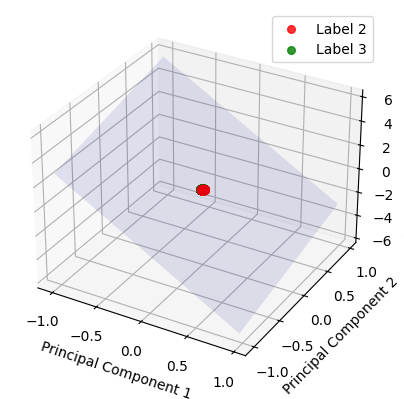

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Assuming xx, yy, zz are already defined

# Plot the hyperplane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot hyperplane
ax.plot_surface(xx, yy, zz, color='b', alpha=0.1)

# Assuming X_train_pca and Y_filtered are already defined

# Plot data points with label 2
ax.scatter(X_train_pca[Y_filtered == 2, 0],
           X_train_pca[Y_filtered == 2, 1],
           X_train_pca[Y_filtered == 2, 2],
           label='Label 2',
           alpha=0.8,  # Increase transparency
           s=30,       # Increase point size
           c='r')      # Change color to red

# Plot data points with label 3
ax.scatter(X_train_pca[Y_filtered == 3, 0],
           X_train_pca[Y_filtered == 3, 1],
           X_train_pca[Y_filtered == 3, 2],
           label='Label 3',
           alpha=0.8,  # Increase transparency
           s=30,       # Increase point size
           c='g')      # Change color to green

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

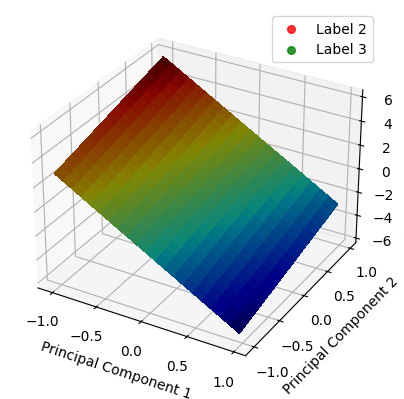

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming you have defined xx, yy, and zz

# Plot the hyperplane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate colors for the surface
N = 10  # Number of divisions for color mapping
norm = plt.Normalize(zz.min(), zz.max())  # Normalize zz for color mapping
colors = cm.jet(norm(zz))  # Apply colormap to zz

# Plot the surface
ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, facecolors=colors, linewidth=0, antialiased=False)

# Plot data points with label 2
ax.scatter(X_train_pca[Y_filtered == 2, 0], X_train_pca[Y_filtered == 2, 1], X_train_pca[Y_filtered == 2, 2], label='Label 2', alpha=0.8, s=30, c='r')

# Plot data points with label 3
ax.scatter(X_train_pca[Y_filtered == 3, 0], X_train_pca[Y_filtered == 3, 1], X_train_pca[Y_filtered == 3, 2], label='Label 3', alpha=0.8, s=30, c='g')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()


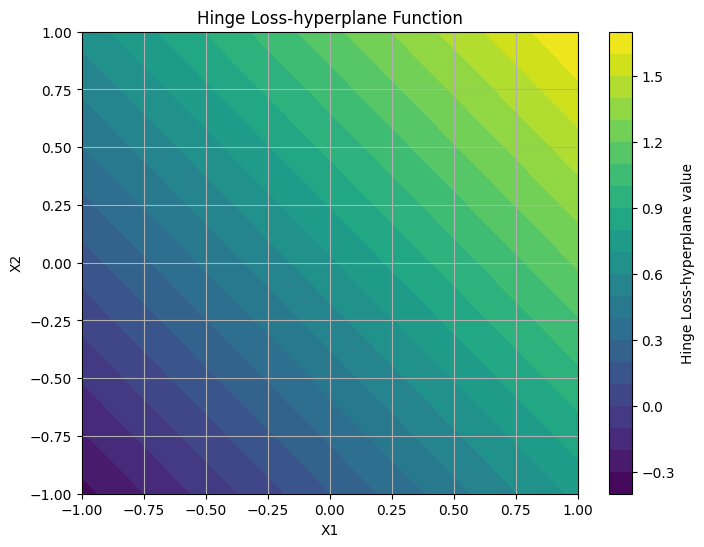

In [12]:


def hinge_loss_hyperplane(w, x, b):
    """
    Compute the Hinge Loss-hyperplane function.
    
    Args:
    - w (numpy.ndarray): Weight vector
    - x (numpy.ndarray): Input vector
    - b (float): Bias term
    
    Returns:
    - float: Result of w.x + b
    """
    return np.dot(w, x) + b

# Generate random weight vector and bias term
w = np.random.rand(2)
b = np.random.rand(1)

# Generate random input vectors
x_values = np.linspace(-1, 1, 100)
y_values = np.linspace(-1, 1, 100)

# Compute Hinge Loss-hyperplane values for each input vector
hinge_values = []
for y in y_values:
    for x in x_values:
        hinge_values.append(hinge_loss_hyperplane(w, np.array([x, y]), b))

# Reshape the hinge values to match the grid of input vectors
hinge_values = np.array(hinge_values).reshape(len(y_values), len(x_values))

# Plot the Hinge Loss-hyperplane function
plt.figure(figsize=(8, 6))
plt.contourf(x_values, y_values, hinge_values, levels=20, cmap='viridis')
plt.colorbar(label='Hinge Loss-hyperplane value')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Hinge Loss-hyperplane Function')
plt.grid(True)
plt.show()
